Import all necessary packages and training data files

In [66]:
import os
import math
import statistics
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import concatenate
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.models import Model

from tensorflow.keras.utils import to_categorical

from livelossplot import PlotLossesKeras

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge

import random
from random import randrange

import cantera as ct
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import CalcMolFormula

import warnings
warnings.filterwarnings('ignore');

Part 1: KRR and One Hot Encoder

C: 3  |  H: 4  |  O: 4  |  N: 4  |  AR: 5


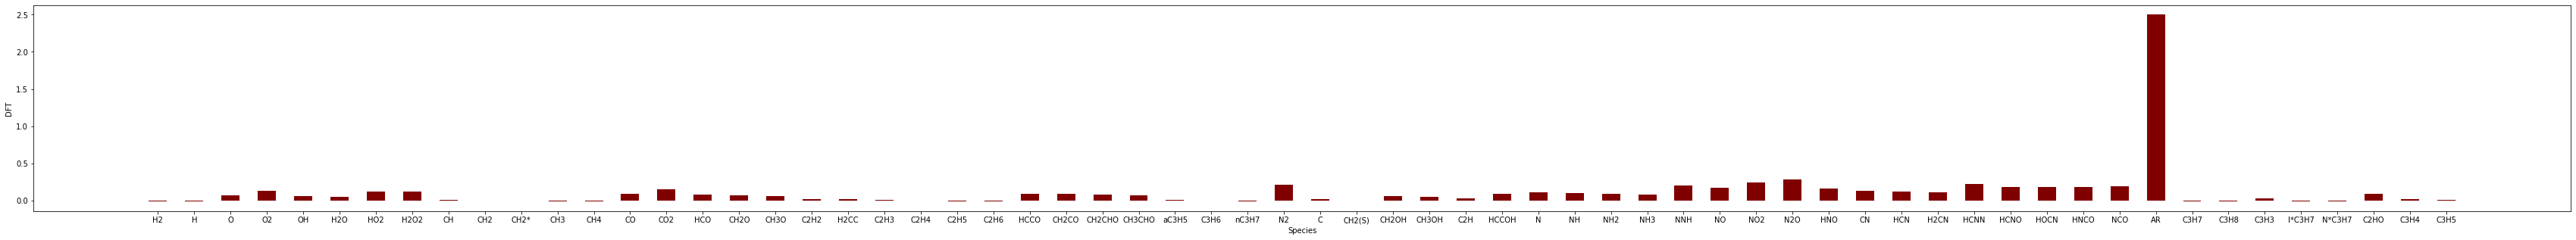

[[-1.75190816e-02 -8.75896918e-03  6.61020032e-02  1.32202096e-01
   5.73421903e-02  4.85835948e-02  1.23442715e-01  1.14684011e-01
   8.97552629e-03  2.17029912e-04  2.16197077e-04 -8.54418319e-03
  -1.73039015e-02  8.38349716e-02  1.49936409e-01  7.50765879e-02
   6.63166859e-02  5.75582935e-02  1.79504015e-02  1.79500764e-02
   9.19004192e-03  4.30257875e-04 -8.32877307e-03 -1.70884343e-02
   9.28098182e-02  8.40502778e-02  7.52902448e-02  6.65333652e-02
   9.40961187e-03  6.47424953e-04 -8.11037354e-03  2.14729363e-01
   1.77339698e-02  2.14974018e-04  5.75585657e-02  4.87987046e-02
   2.67091409e-02  8.40508797e-02  1.07364217e-01  9.86054640e-02
   8.98461279e-02  8.10853750e-02  2.05969241e-01  1.73464771e-01
   2.39566034e-01  2.80829104e-01  1.64706269e-01  1.25098161e-01
   1.16338831e-01  1.07579447e-01  2.23703871e-01  1.82440641e-01
   1.82440483e-01  1.82440176e-01  1.91198968e-01  2.49999985e+00
  -8.11046571e-03 -1.68671155e-02  2.69232843e-02 -8.10728723e-03
  -8.10884

In [9]:
df_elements = pd.read_excel('C:\\Users\\opbir\\Documents\\ML_trainingData_element_df.xlsx');
elements = df_elements.to_numpy()[:,1:df_elements.shape[1]];
elements_arr = elements[:,1:df_elements.shape[1]];
categories = np.multiply(np.ones(len(range(2,df_elements.shape[1]))),range(0,df_elements.shape[1]-2));
encoded = to_categorical(categories);

element_C = np.transpose(np.asarray(elements_arr).astype('float32'))[:,0]; element_C = element_C.reshape(element_C.shape[0],1);
element_H = np.transpose(np.asarray(elements_arr).astype('float32'))[:,1]; element_H = element_H.reshape(element_H.shape[0],1);
element_O = np.transpose(np.asarray(elements_arr).astype('float32'))[:,2]; element_O = element_O.reshape(element_O.shape[0],1);
element_N = np.transpose(np.asarray(elements_arr).astype('float32'))[:,3]; element_N = element_N.reshape(element_N.shape[0],1);
element_AR = np.transpose(np.asarray(elements_arr).astype('float32'))[:,4]; element_AR = element_AR.reshape(element_AR.shape[0],1);

x = np.concatenate((element_C,element_H,element_O,element_N,element_AR),axis=1);
y = encoded;

regr = KernelRidge(alpha=1.0);
regr.fit(x,y);

test_C = randrange(6); 
test_H = randrange(6);
test_O = randrange(6); 
test_N = randrange(6); 
test_AR = randrange(6); 

print("C: "+str(test_C)+"  |  "+"H: "+str(test_H)+"  |  "+"O: "+str(test_O)+"  |  "+"N: "+str(test_N)+"  |  "+"AR: "+str(test_AR));

predicted = regr.predict([[test_C,test_H,test_O,test_N,test_AR]]);

if test_C == 0:
    for i in range(0,len(predicted[0])):
        if element_C[i] != 0:
            predicted[0][i] = 0;
if test_H == 0:
    for i in range(0,len(predicted[0])):
        if element_H[i] != 0:
            predicted[0][i] = 0;
if test_O == 0:
    for i in range(0,len(predicted[0])):
        if element_O[i] != 0:
            predicted[0][i] = 0;
if test_N == 0:
    for i in range(0,len(predicted[0])):
        if element_N[i] != 0:
            predicted[0][i] = 0;
if test_AR == 0:
    for i in range(0,len(predicted[0])):
        if element_AR[i] != 0:
            predicted[0][i] = 0;

# Plot weights
fig = plt.figure(figsize = (60,5));
speciesLabel = list(pd.DataFrame(pd.read_excel("C:\\Users\\opbir\\Documents\\ML_trainingData.xlsx")))[9:];
plt.bar(speciesLabel, predicted.tolist()[0], color ='maroon', width = 0.5)
plt.xlabel("Species");
plt.ylabel("DFT");
plt.show();

print(predicted)

Part 2: Find chemical equilibrium products

For each species in r and p, use previous part to calculate probability of species existing. Then multiply r and p stoichiometric coefficients by the probability. 

In [10]:
speciesLabel = list(pd.DataFrame(pd.read_excel("C:\\Users\\opbir\\Documents\\ML_trainingData.xlsx")));
speciesLabel = speciesLabel[9:encoded.shape[1]]
for i in range(0,len(speciesLabel)):
    print([i,speciesLabel[i]])

[0, 'H2']
[1, 'H']
[2, 'O']
[3, 'O2']
[4, 'OH']
[5, 'H2O']
[6, 'HO2']
[7, 'H2O2']
[8, 'CH']
[9, 'CH2']
[10, 'CH2*']
[11, 'CH3']
[12, 'CH4']
[13, 'CO']
[14, 'CO2']
[15, 'HCO']
[16, 'CH2O']
[17, 'CH3O']
[18, 'C2H2']
[19, 'H2CC']
[20, 'C2H3']
[21, 'C2H4']
[22, 'C2H5']
[23, 'C2H6']
[24, 'HCCO']
[25, 'CH2CO']
[26, 'CH2CHO']
[27, 'CH3CHO']
[28, 'aC3H5']
[29, 'C3H6']
[30, 'nC3H7']
[31, 'N2']
[32, 'C']
[33, 'CH2(S)']
[34, 'CH2OH']
[35, 'CH3OH']
[36, 'C2H']
[37, 'HCCOH']
[38, 'N']
[39, 'NH']
[40, 'NH2']
[41, 'NH3']
[42, 'NNH']
[43, 'NO']
[44, 'NO2']
[45, 'N2O']
[46, 'HNO']
[47, 'CN']
[48, 'HCN']
[49, 'H2CN']
[50, 'HCNN']
[51, 'HCNO']
[52, 'HOCN']
[53, 'HNCO']
[54, 'NCO']


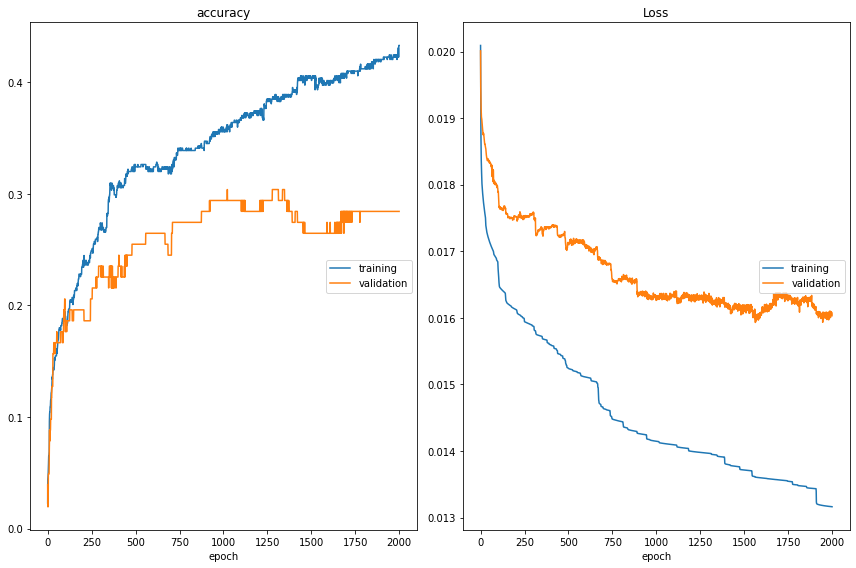

accuracy
	training         	 (min:    0.023, max:    0.433, cur:    0.433)
	validation       	 (min:    0.020, max:    0.304, cur:    0.284)
Loss
	training         	 (min:    0.013, max:    0.020, cur:    0.013)
	validation       	 (min:    0.016, max:    0.020, cur:    0.016)
4/4 [==============================] - 0s 997us/step - loss: 0.0145 - accuracy: 0.2816


In [11]:
directory = "C:\\Users\\opbir\\Documents\\ML Training Data - Copy";

count = 0;
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)         # full file directory
    if os.path.isfile(f):        
        if count == 0:
            df1 = np.array([], dtype=np.int64).reshape(0,len(pd.read_excel(f).columns));
            df = np.concatenate((df1,pd.read_excel(f).to_numpy()), axis=0);
            count = count+1;
        else:
            df = np.concatenate((df,pd.read_excel(f).to_numpy()), axis=0);

df_r = df[:,10:];
np.asarray(df_r).astype('float32');
for r in range(0,df_r.shape[0]):
    for c in range(0,df_r.shape[1]):
        if df_r[r,c] > 0:          # reactants: if negative
            df_r[r,c] = 0;
        elif df_r[r,c] < 0:
            weight_r = regr.predict([np.transpose(elements_arr[:,c])]);
            for rw in range(0,weight_r.shape[0]):
                for cw in range(0,weight_r.shape[1]):
                    if weight_r[rw,cw] < 0:
                        weight_r[rw,cw] = 0;
            df_r[r,c] = df_r[r,c]*weight_r[0][c];
            
count = 0;
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)         # full file directory
    if os.path.isfile(f):        
        if count == 0:
            df1 = np.array([], dtype=np.int64).reshape(0,len(pd.read_excel(f).columns));
            df = np.concatenate((df1,pd.read_excel(f).to_numpy()), axis=0);
            count = count+1;
        else:
            df = np.concatenate((df,pd.read_excel(f).to_numpy()), axis=0);
            
df_p = df[:,10:];
np.asarray(df_p).astype('float32');
for r in range(0,df_p.shape[0]):
    for c in range(0,df_p.shape[1]):
        if df_p[r,c] < 0:          # product: if positive
            df_p[r,c] = 0;
        elif df_p[r,c] > 0:
            weight_p = regr.predict([np.transpose(elements_arr[:,c])]);
            for rw in range(0,weight_p.shape[0]):
                for cw in range(0,weight_p.shape[1]):
                    if weight_p[rw,cw] < 0:
                        weight_p[rw,cw] = 0;
            df_p[r,c] = df_p[r,c]*weight_p[0][c]; 

df_test = pd.DataFrame(df_r);
df_test.to_excel("C:\\Users\\opbir\\Documents\\df_test.xlsx");

# Input and output layers
x = np.asarray(df_r).astype('float32');
y = np.asarray(df_p).astype('float32');

# Split data into training, testing, and validation data
x_train,x_valTest,y_train,y_valTest = train_test_split(x,y,test_size=0.3);
x_val,x_test,y_val,y_test = train_test_split(x_valTest,y_valTest,test_size=0.5);

# Train, test, and validate data
model = Sequential([
    Dense(df_r.shape[1],activation='relu'),
])

model.compile(optimizer='adamax',
             loss='binary_crossentropy',
             metrics=['accuracy'])

hist = model.fit(x_train,y_train,
                batch_size=df_r.shape[1],epochs=2000,
                 callbacks=[PlotLossesKeras()],
                validation_data=(x_val,y_val));

model.evaluate(x_test,y_test)[1];

4 H2O + 3 CH3O + 4 CH3CHO + 5 HCNN


13.9515 H2O2 + 0.0562704 CH + 0.112376 CH2 + 0.350686 CH2* + 1.28797 CH3 + 0.599636 CH4 + 1.12332 H2CC + 0.723618 C2H3 + 0.428678 nC3H7 + 0.533215 CH2(S) + 0.0103685 CH2OH + 1.56205 CH3OH + 6.70295 NNH + 1.60609 N2O + 2.6108 CN + 2.505 HCN


C: 0.351648
H: 0.0695971
O: 0.322344
N: 0.25641
AR: 0


C: 0.182014
H: 0.0580956
O: 0.471441
N: 0.288449
AR: 0

RME: 0.010432860431802407    |    RMSE: 0.10214137473033348
2 C2H3 + 1 CH3CHO + 3 N


0.316542 HO2 + 0.00528939 CH + 0.156397 CH2 + 0.0425135 CH3 + 0.224589 C2H2 + 0.0393622 H2CC + 0.266714 C2H3 + 0.022115 CH2CHO + 0.0526857 CH3CHO + 0.794443 aC3H5 + 0.131369 nC3H7 + 0.6087 N2 + 0.0835321 CH2OH + 0.136567 CH3OH + 0.241159 HCCOH + 0.0829212 NH2 + 0.157706 NH3 + 0.454702 NO + 0.117948 NO2 + 0.396287 CN + 0.139125 H2CN


C: 0.514286
H: 0.0714286
O: 0.114286
N: 0.3
AR: 0


C: 0.487363
H: 0.0680464
O: 0.201415
N: 0.243176
AR: 0

RME: 0.002311365898257099    |    RMSE: 0.048076666879652744
1 CO + 3 HNO


0.0

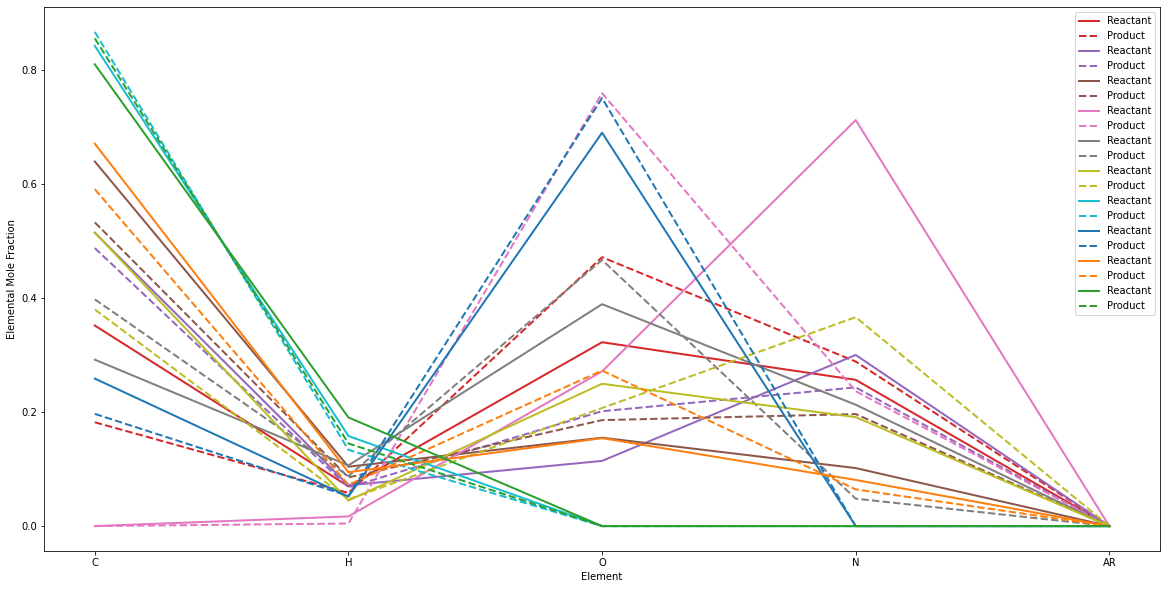


Average RME: 0.013577794567483252    |    Average RMSE: 0.0864019544883913


In [72]:
plt.figure(figsize=(20,10));

finalReac3 = [];
finalProd3 = [];

mse_tot = [];
rmse_tot = [];

for k in range(0,10):
    newArr = x;
    newArr[:,:] = 0;

    mask = x;
    mask[:,:] = 0;

    n_reac = random.randint(2,6);
    for i in range(0,n_reac):
        col = random.randint(0,newArr.shape[1]-1);
        newArr[0,col] = -1*random.randint(1,5);

    newArr = np.asarray(newArr).astype('float32');
    predicted_prod = model.predict(newArr)[0,:];

    df_predicted = pd.DataFrame(predicted_prod);
    df_predicted.to_excel("C:\\Users\\opbir\\Documents\\predicted_prod.xlsx");

    newWeight_r_tot = np.zeros(newArr.shape[1]);

    for c in range(0,newArr.shape[1]):
        if newArr[0,c] < 0:
            newWeight_r = regr.predict([np.transpose(elements_arr[:,c])]); 
            newWeight_r_tot = np.vstack([newWeight_r_tot,newWeight_r]);
    newWeight_r_tot = newWeight_r_tot[1:,:];

    for rw in range(0,newWeight_r_tot.shape[0]):
        for cw in range(0,newWeight_r_tot.shape[1]):
            if newWeight_r_tot[rw,cw] < 0:
                newWeight_r_tot[rw,cw] = 0;

    r_C = 0; r_H = 0; r_O = 0; r_N = 0; r_AR = 0;
    for c in range(0,newArr.shape[1]):
        if newArr[0,c] < 0:                                
            if elements_arr[0,c] != 0:
                r_C = r_C+(-1*newArr[0,c]*elements_arr[0,c]);
            if elements_arr[1,c] != 0:
                r_H = r_H+(-1*newArr[0,c]*elements_arr[1,c]);
            if elements_arr[2,c] != 0:
                r_O = r_O+(-1*newArr[0,c]*elements_arr[2,c]);
            if elements_arr[3,c] != 0:
                r_N = r_N+(-1*newArr[0,c]*elements_arr[3,c]);
            if elements_arr[4,c] != 0:
                r_AR = r_AR+(-1*newArr[0,c]*elements_arr[4,c]);
    r_tot = (12*r_C)+r_H+(16*r_O)+(14*r_N)+(40*r_AR);

    for j in range(0,len(newWeight_r_tot)):
        if r_C == 0:
            for i in range(0,len(newWeight_r_tot[0])):
                if element_C[i] != 0:
                    newWeight_r_tot[j][i] = 0;
        if r_H == 0:
            for i in range(0,len(newWeight_r_tot[0])):
                if element_H[i] != 0:
                    newWeight_r_tot[j][i] = 0;
        if r_O == 0:
            for i in range(0,len(newWeight_r_tot[0])):
                if element_O[i] != 0:
                    newWeight_r_tot[j][i] = 0;
        if r_N == 0:
            for i in range(0,len(newWeight_r_tot[0])):
                if element_N[i] != 0:
                    newWeight_r_tot[j][i] = 0;
        if r_AR == 0:
            for i in range(0,len(newWeight_r_tot[0])):
                if element_AR[i] != 0:
                    newWeight_r_tot[j][i] = 0;

    mask_r = pd.DataFrame(newWeight_r_tot).sum(axis=0);

    finalProd = np.multiply(predicted_prod,np.transpose(mask_r));

    p_C = 0; p_H = 0; p_O = 0; p_N = 0; p_AR = 0;
    for i in range(0,len(finalProd)):
        if finalProd[i] != 0:
            if r_C != 0:
                p_C = p_C+(elements_arr[0,i]*finalProd[i]);
            if r_H != 0:
                p_H = p_H+(elements_arr[1,i]*finalProd[i]);
            if r_O != 0:
                p_O = p_O+(elements_arr[2,i]*finalProd[i]);
            if r_N != 0:
                p_N = p_N+(elements_arr[3,i]*finalProd[i]);
            if r_AR != 0:
                p_AR = p_AR+(elements_arr[4,i]*finalProd[i]);
    p_tot = (12*p_C)+p_H+(16*p_O)+(14*p_N)+(40*p_AR);

    # Normalized
    if r_C != 0:
        normalize_C = r_C/p_C;
        finalProd2 = finalProd*normalize_C;
    elif r_H != 0:
        normalize_H = r_H/p_H;
        finalProd2 = finalProd*normalize_H;
    elif r_O != 0:
        normalize_O = r_O/p_O;
        finalProd2 = finalProd*normalize_O;
    elif r_N != 0:
        normalize_N = r_N/p_N;
        finalProd2 = finalProd*normalize_N;
    elif r_AR != 0:
        normalize_AR = r_AR/p_AR;
        finalProd2 = finalProd*normalize_AR;

    count = 0;
    for i in range(0,len(speciesLabel)):
        if newArr[0,i] != 0 and count == 0:
            eq_r = str(-1*math.floor(newArr[0,i])) + ' ' + speciesLabel[i];
            count = count + 1;
        elif newArr[0,i] != 0 and i != 0:
            eq_r = eq_r + " + " + str(-1*math.floor(newArr[0,i])) + ' ' + speciesLabel[i];

    count = 0;
    for i in range(0,len(speciesLabel)):
        if finalProd2[i] != 0 and count == 0:
            eq_p = str('{0:.6g}'.format(finalProd2[i])) + ' ' + speciesLabel[i];
            count = count + 1;
        elif finalProd2[i] != 0 and i != 0:
            eq_p = eq_p + " + " + str('{0:.6g}'.format(finalProd2[i])) + ' ' + speciesLabel[i];

    print(eq_r);
    print("\n");
    print(eq_p);
    print("\n");
    print("C: "+str('{0:.6g}'.format(12*r_C/r_tot))+"\n"+"H: "+str('{0:.6g}'.format(r_H/r_tot))+"\n"+"O: "+str('{0:.6g}'.format(16*r_O/r_tot))+"\n"+"N: "+str('{0:.6g}'.format(14*r_N/r_tot))+"\n"+"AR: "+str('{0:.6g}'.format(40*r_AR/r_tot)));
    print("\n");
    print("C: "+str('{0:.6g}'.format(12*p_C/p_tot))+"\n"+"H: "+str('{0:.6g}'.format(p_H/p_tot))+"\n"+"O: "+str('{0:.6g}'.format(16*p_O/p_tot))+"\n"+"N: "+str('{0:.6g}'.format(14*p_N/p_tot))+"\n"+"AR: "+str('{0:.6g}'.format(40*p_AR/p_tot)));

    mse = sklearn.metrics.mean_squared_error([12*r_C/r_tot,r_H/r_tot,16*r_O/r_tot,14*r_N/r_tot,40*r_AR/r_tot], [12*p_C/p_tot,p_H/p_tot,16*p_O/p_tot,14*p_N/p_tot,40*p_AR/p_tot]);
    rmse = math.sqrt(mse);
    print("\n"+"RME: "+str(mse)+"    |    RMSE: "+str(rmse));
    
    mse_tot = np.append(mse_tot,mse);
    rmse_tot = np.append(rmse_tot,rmse);
    
    finalReac3 = pd.DataFrame(finalReac3).append(np.transpose(pd.DataFrame(newArr[0])));
    finalProd3 = pd.DataFrame(finalProd3).append(np.transpose(pd.DataFrame(finalProd2)));
    
    ticks = [0,1,2,3,4];
    color=next(ax._get_lines.prop_cycler)['color'];
    plt.plot(ticks,[12*r_C/r_tot,r_H/r_tot,16*r_O/r_tot,14*r_N/r_tot,40*r_AR/r_tot],color=color,label="Reactant",linewidth=2);
    plt.plot(ticks,[12*p_C/p_tot,p_H/p_tot,16*p_O/p_tot,14*p_N/p_tot,40*p_AR/p_tot],'--',color=color,label="Product",linewidth=2);
    
plt.xlabel('Element');
plt.ylabel('Elemental Mole Fraction');
labels = ["C","H","O","N","AR"];
plt.xticks(ticks, labels);
plt.legend(loc="upper right");
plt.show();

mse_avg = statistics.mean(mse_tot);
rmse_avg = statistics.mean(rmse_tot);
print("\n"+"Average RME: "+str(mse_avg)+"    |    Average RMSE: "+str(rmse_avg));

pd.DataFrame(finalReac3).to_excel("C:\\Users\\opbir\\Documents\\reac_final.xlsx");
pd.DataFrame(finalProd3).to_excel("C:\\Users\\opbir\\Documents\\predicted_prod_final.xlsx");

Part 3: Predict activation energy

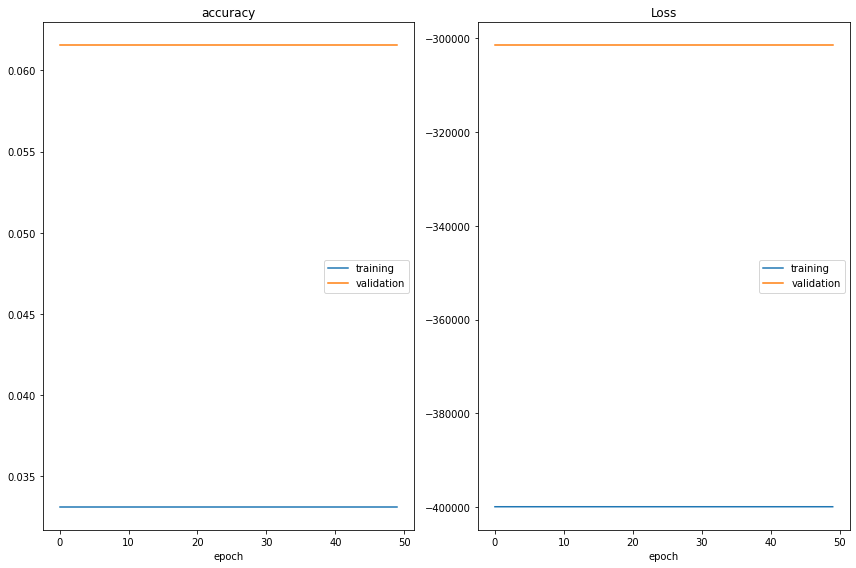

accuracy
	training         	 (min:    0.033, max:    0.033, cur:    0.033)
	validation       	 (min:    0.062, max:    0.062, cur:    0.062)
Loss
	training         	 (min: -399878.562, max: -399878.500, cur: -399878.531)
	validation       	 (min: -301534.969, max: -301534.969, cur: -301534.969)
5/5 [==============================] - 0s 55ms/step - loss: -399878.5312 - accuracy: 0.0331 - val_loss: -301534.9688 - val_accuracy: 0.0615


In [34]:
# ENERGY
directory_E = "C:\\Users\\opbir\\Documents\\ML Training Data Energy";

# Reactant
count = 0;
for filename_E in os.listdir(directory_E):
    f_E = os.path.join(directory_E, filename_E)         # full file directory
    if os.path.isfile(f_E):        
        if count == 0:
            df1_E = np.array([], dtype=np.int64).reshape(0,len(pd.read_excel(f_E).columns));
            df_E = np.concatenate((df1_E,pd.read_excel(f_E).to_numpy()), axis=0);
            count = count+1;
        else:
            df_E = np.concatenate((df_E,pd.read_excel(f_E).to_numpy()), axis=0);

df_r_E = df_E[:,2:];
np.asarray(df_r_E).astype('float32');
for r_E in range(0,df_r_E.shape[0]):
    for c_E in range(0,df_r_E.shape[1]):
        if df_r_E[r_E,c_E] > 0:          # reactants: if negative
            df_r_E[r_E,c_E] = 0;

# Product  
count = 0;
for filename_E in os.listdir(directory_E):
    f_E = os.path.join(directory_E, filename_E)         # full file directory
    if os.path.isfile(f_E):        
        if count == 0:
            df1_E = np.array([], dtype=np.int64).reshape(0,len(pd.read_excel(f_E).columns));
            df_E = np.concatenate((df1_E,pd.read_excel(f_E).to_numpy()), axis=0);
            count = count+1;
        else:
            df_E = np.concatenate((df_E,pd.read_excel(f_E).to_numpy()), axis=0);
                        
df_p_E = df_E[:,2:];
np.asarray(df_p_E).astype('float32');
for r_E in range(0,df_p_E.shape[0]):
    for c_E in range(0,df_p_E.shape[1]):
        if df_p_E[r_E,c_E] < 0:          # product: if positive
            df_p_E[r_E,c_E] = 0;
            
df_test_E = pd.DataFrame(df_p_E);
df_test_E.to_excel("C:\\Users\\opbir\\Documents\\df_test_E.xlsx");

# MOLAR MASS
directory_MW = "C:\\Users\\opbir\\Documents\\ML Training Data MW";

# Reactant
count = 0;
for filename_MW in os.listdir(directory_MW):
    f_MW = os.path.join(directory_MW, filename_MW)         # full file directory
    if os.path.isfile(f_MW):        
        if count == 0:
            df1_MW = np.array([], dtype=np.int64).reshape(0,len(pd.read_excel(f_MW).columns));
            df_MW = np.concatenate((df1_MW,pd.read_excel(f_MW).to_numpy()), axis=0);
            count = count+1;
        else:
            df_MW = np.concatenate((df_MW,pd.read_excel(f_MW).to_numpy()), axis=0);

df_r_MW = df_MW[:,2:];
np.asarray(df_r_MW).astype('float32');
for r_MW in range(0,df_r_MW.shape[0]):
    for c_MW in range(0,df_r_MW.shape[1]):
        if df_r_MW[r_MW,c_MW] > 0:          # reactants: if negative
            df_r_MW[r_MW,c_MW] = 0;

# Product  
count = 0;
for filename_MW in os.listdir(directory_MW):
    f_MW = os.path.join(directory_MW, filename_MW)         # full file directory
    if os.path.isfile(f_MW):        
        if count == 0:
            df1_MW = np.array([], dtype=np.int64).reshape(0,len(pd.read_excel(f_MW).columns));
            df_MW = np.concatenate((df1_MW,pd.read_excel(f_MW).to_numpy()), axis=0);
            count = count+1;
        else:
            df_MW = np.concatenate((df_MW,pd.read_excel(f_MW).to_numpy()), axis=0);
                        
df_p_MW = df_MW[:,2:];
np.asarray(df_p_MW).astype('float32');
for r_MW in range(0,df_p_MW.shape[0]):
    for c_MW in range(0,df_p_MW.shape[1]):
        if df_p_MW[r_MW,c_MW] < 0:          # product: if positive
            df_p_MW[r_MW,c_MW] = 0;
            
df_test_MW = pd.DataFrame(df_p_MW);
df_test_MW.to_excel("C:\\Users\\opbir\\Documents\\df_test_MW.xlsx");

# Convert to mole fractions from molar mass/molecular weight
df_r_moleFraction = df_r_MW;
for r_MW in range(0,df_r_moleFraction.shape[0]):
    df_r_moleFraction_tot = 0;
    for c_MW in range(0,df_r_moleFraction.shape[1]):
        df_r_moleFraction_tot = df_r_moleFraction_tot+df_r_MW[r_MW,c_MW];
    for c_MW in range(0,df_r_moleFraction.shape[1]):
        df_r_moleFraction[r_MW,c_MW] = df_r_MW[r_MW,c_MW]/df_r_moleFraction_tot; 
df_r_moleFraction = abs(df_r_moleFraction);
print(df_r_moleFraction);
    
df_p_moleFraction = df_p_MW;
for r_MW in range(0,df_p_moleFraction.shape[0]):
    df_p_moleFraction_tot = 0;
    for c_MW in range(0,df_p_moleFraction.shape[1]):
        df_p_moleFraction_tot = df_p_moleFraction_tot+df_p_MW[r_MW,c_MW];
    for c_MW in range(0,df_p_moleFraction.shape[1]):
        df_p_moleFraction[r_MW,c_MW] = df_p_MW[r_MW,c_MW]/df_p_moleFraction_tot;
df_p_moleFraction = abs(df_p_moleFraction);
print(df_p_moleFraction);

df_test_MF = pd.DataFrame(df_p_moleFraction);
df_test_MF.to_excel("C:\\Users\\opbir\\Documents\\df_test_MF.xlsx");

# Calculate enthalpic/reaction energy (dH)
H_r_tot = [];
H_p_tot = [];
dH_tot = [];

for r in range(0,df_r_moleFraction.shape[0]):
    H_r = 0;
    H_p = 0;
    for c in range(0,df_r_moleFraction.shape[1]):
        H_r = H_r + df_r_moleFraction[r,c]*df_r_E[r,c];
        H_p = H_p + df_p_moleFraction[r,c]*df_p_E[r,c];
        dH = H_p-(-1*H_r);
                
    H_r_tot.append(H_r);
    H_p_tot.append(H_p);
    dH_tot.append(dH);

H_r_arr = np.multiply(df_r_moleFraction,df_r_E);
H_p_arr = np.multiply(df_p_moleFraction,df_p_E);
    
directory = 'C:\\Program Files\\Cantera\\data\\ML datasets';
ct.add_directory('C:\\Program Files\\Cantera\\data\\ML datasets');

dP = float('inf');
uniqueSpecies = [];

for filename in os.listdir(directory):
    f = os.path.join(directory,filename)         # full file directory
    if os.path.isfile(f):
        gas = ct.Solution(filename);

        # Get all unique species from all datasets
        for k in gas.species():
            species = k.name;
            if species not in uniqueSpecies:
                uniqueSpecies.append(species);
print(uniqueSpecies);

formulaList = [];
with open("C:\\Users\\opbir\\Documents\\Rad-6_databases2.txt",'r') as f:
    count2 = 1;
    for line in f:
        if "Properties=species:S:1:pos:R:3:uff:R:3" in line:
            indx_count = 0;
            smile_indx = line.find("smile");
            while line[smile_indx+7+indx_count] != '"':
                indx_count = indx_count + 1;
            smile = line[smile_indx+7:smile_indx+7+indx_count];

            try:
                mol = Chem.MolFromSmiles(smile);
                formula = CalcMolFormula(mol);
                if formula == 'HO':
                    formula = 'OH';
                uniqueAtoms = {atom.GetSymbol() for atom in mol.GetAtoms()};

                if formula in uniqueSpecies:
                    formulaList.append(formula)
            except: 
                pass;

            count2 = count2 + 1;

R = 8.1345;                     # Universal gas constant [J/(mol*K)]
A = df[:,2];                    # Pre-exponential factor [kmol,(m^3),s]
b = df[:,3];                    # Temperature exponent [-]
Ea = df[:,4]/1000;         # Activation energy [J/mol]
k = df[:,6];                    # Forward rate constant/reaction rate [kmol,(m^3),s]
        
indx_del = [];
for r in range(0,df_r_moleFraction.shape[0]):
    for c in range(0,df_r_moleFraction.shape[1]):
        if df_r[r,c] != 0 and uniqueSpecies[c] not in formulaList:
            indx_del.append(r);
    
indx_keep = [];
for r in range(0,df_r_moleFraction.shape[0]):
    if r not in indx_del:
        indx_keep.append(r);

H_r_arr1 = H_r_arr[indx_keep];
H_p_arr1 = H_p_arr[indx_keep];
Ea1 = Ea[indx_keep];

pd.DataFrame(H_r_arr1).to_excel("C:\\Users\\opbir\\Documents\\df_test_Hr.xlsx");
pd.DataFrame(H_p_arr1).to_excel("C:\\Users\\opbir\\Documents\\df_test_Hp.xlsx");

xx1 = np.asarray(H_r_arr1).astype('float32');
xx2 = np.asarray(H_p_arr1).astype('float32');
yy = np.asarray(Ea1).astype('float32');

input1 = Input(shape = (H_r_arr1.shape[1],H_r_arr1.shape[1]))
input2 = Input(shape = (H_p_arr1.shape[1],H_p_arr1.shape[1]))

# Branch 1
xb1 = Dense(units = H_r_arr1.shape[1], activation="relu")(input1)
xb1 = Dense(units = H_r_arr1.shape[1], activation="relu")(xb1)
xb1 = Model(inputs=input1, outputs=xb1)

# Branch 2
xb2 = Dense(units = H_p_arr1.shape[1], activation="relu")(input2)
xb2 = Dense(units = H_p_arr1.shape[1], activation="relu")(xb2)
xb2 = Model(inputs=input2, outputs=xb2)

# Combine branch 1 and 2
xb = tf.keras.layers.Concatenate()([xb1.output, xb2.output])

yb = Dense(len(Ea1), activation='relu')(xb)
yb = Dense(1)(yb)

# The model will accept the inputs of the two branches and then output a single value
model3 = Model(inputs = [xb1.input, xb2.input], outputs = yb)
model3.compile(optimizer='adamax',
             loss='binary_crossentropy',
             metrics=['accuracy'])

x_train1,x_valTest1,x_train2,x_valTest2,y_train,y_valTest = train_test_split(xx1,xx2,yy,test_size=0.3);
x_val1,x_test1,x_val2,x_test2,y_val,y_test = train_test_split(x_valTest1,x_valTest2,y_valTest,test_size=0.5);

hist3 = model3.fit([x_train1,x_train2],y_train,
                batch_size=df_r.shape[1],epochs=50,
                callbacks=[PlotLossesKeras()],
                validation_data=([x_val1,x_val2],y_val));

In [35]:
for k in range(0,9): 

    # Stoichiometric coefficients
    directory = "C:\\Users\\opbir\\Documents\\ML Training Data - Copy";

    count = 0;
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)         # full file directory
        if os.path.isfile(f):        
            if count == 0:
                df2 = np.array([], dtype=np.int64).reshape(0,len(pd.read_excel(f).columns));
                df3 = np.concatenate((df2,pd.read_excel(f).to_numpy()), axis=0);
                count = count+1;
            else:
                df3 = np.concatenate((df3,pd.read_excel(f).to_numpy()), axis=0);

    df_all = df3[:,10:];
    np.asarray(df_all).astype('float32');

    # Molar mass and mass fraction
    directory_MW = "C:\\Users\\opbir\\Documents\\ML Training Data MW";

    count = 0;
    for filename_MW in os.listdir(directory_MW):
        f_MW = os.path.join(directory_MW, filename_MW)         # full file directory
        if os.path.isfile(f_MW):        
            if count == 0:
                df2_MW = np.array([], dtype=np.int64).reshape(0,len(pd.read_excel(f_MW).columns));
                df3_MW = np.concatenate((df2_MW,pd.read_excel(f_MW).to_numpy()), axis=0);
                count = count+1;
            else:
                df3_MW = np.concatenate((df3_MW,pd.read_excel(f_MW).to_numpy()), axis=0);

    df_all_MW = df3_MW[:,2:];
    np.asarray(df_all_MW).astype('float32');

    MW1 = np.zeros((1,df_r_MW.shape[1]));
    for c in range(0,df_r_MW.shape[1]):
        for r in range(0,df_r_MW.shape[0]):
            if df_r_MW[r,c] != 0:
                MW1[0,c] = df_all_MW[r,c]/df_all[r,c];

    finalReac5 = np.zeros((df_r.shape[0],df_r.shape[1]));
    finalReac4 = np.asarray(finalReac3).astype('float32');
    finalReac5[0,:] = finalReac4[k,:];
    MW_r = MW1*finalReac5;

    df_r1_moleFraction = MW_r;
    for r_MW in range(0,df_r1_moleFraction.shape[0]):
        df_r1_moleFraction_tot = 0;
        for c_MW in range(0,df_r1_moleFraction.shape[1]):
            df_r1_moleFraction_tot = df_r1_moleFraction_tot+MW_r[r_MW,c_MW];
        for c_MW in range(0,df_r1_moleFraction.shape[1]):
            df_r1_moleFraction[r_MW,c_MW] = MW_r[r_MW,c_MW]/df_r1_moleFraction_tot;

    finalProd5 = np.zeros((df_r.shape[0],df_r.shape[1]));
    finalProd3 = np.asarray(finalProd3).astype('float32');
    finalProd4 = finalProd3[k,:].reshape(len(finalProd3[k,:]),1);
    finalProd5[0,:] = np.transpose(finalProd4);

    MW_p = np.zeros((finalReac5.shape[0],finalReac5.shape[1]));
    MW_p[0,:] = np.multiply(MW1,np.transpose(finalProd4))[0];

    df_p1_moleFraction = MW_p;
    for r_MW in range(0,df_p1_moleFraction.shape[0]):
        df_p1_moleFraction_tot = 0;
        for c_MW in range(0,df_p1_moleFraction.shape[1]):
            df_p1_moleFraction_tot = df_p1_moleFraction_tot+MW_p[r_MW,c_MW];
        for c_MW in range(0,df_p1_moleFraction.shape[1]):
            df_p1_moleFraction[r_MW,c_MW] = MW_p[r_MW,c_MW]/df_p1_moleFraction_tot;

    # Energy
    directory_E = "C:\\Users\\opbir\\Documents\\ML Training Data Energy";

    count = 0;
    for filename_E in os.listdir(directory_E):
        f_E = os.path.join(directory_E, filename_E)         # full file directory
        if os.path.isfile(f_E):        
            if count == 0:
                df2_E = np.array([], dtype=np.int64).reshape(0,len(pd.read_excel(f_E).columns));
                df3_E = np.concatenate((df2_E,pd.read_excel(f_E).to_numpy()), axis=0);
                count = count+1;
            else:
                df3_E = np.concatenate((df3_E,pd.read_excel(f_E).to_numpy()), axis=0);

    df_all_E = df3_E[:,2:];
    np.asarray(df_all_E).astype('float32');

    E1 = np.zeros((1,df_all_E.shape[1]));
    for c in range(0,df_all_E.shape[1]):
        for r in range(0,df_all_E.shape[0]):
            if df_all_E[r,c] != 0:
                E1[0,c] = df_all_E[r,c];

    H_r1 = np.multiply(df_r1_moleFraction,E1);
    H_p1 = np.multiply(df_p1_moleFraction,E1);

    H_r2 = np.zeros((H_r1.shape[0],H_r1.shape[1]));
    H_r2[0,:] = H_r1[0]; 

    H_p2 = np.zeros((H_p1.shape[0],H_p1.shape[1]));
    H_p2[0,:] = H_p1[0]; 
    
    predicted_Ea = model3.predict([np.asarray(H_r2).astype('float32'),np.asarray(H_p2).astype('float32')])[0][0];
    print(abs(predicted_Ea));

25550.426
24160.537
6158.0234
nan
47023.83
15344.554
40689.562
14345.637
17569.854
